## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the DataFrame.
#In this study, 249 mice & 1893 identified with SCC tumor growth were treated through a variety of drug regimens.
number_of_mice = len(mouse_metadata["Mouse ID"])
number_of_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
# Study Results are showing Mouse ID that is showing to be repeated in both the dataframes are "g989"
dup_mouse = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
# Droping Duplicate Mouse ID g989 rows found in duplicated data above
# This particular Mouse ID g989 has 13 rows 
dup_mouse_id = dup_mouse.drop_duplicates()
dup_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Clean_Mouse_DF = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] != 'g989']     
#Clean_Mouse_DF = pd.DataFrame(Clean_Mouse_DF)
Clean_Mouse_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_of_mice = Clean_Mouse_DF["Mouse ID"].value_counts()
clean_of_mice

q511    10
c282    10
j984    10
q597    10
r811    10
        ..
x336     1
t573     1
h428     1
b447     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [13]:
# Note to self there are 10 drugs total 
#List of Drugs" Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol"
# NOTE TO SELF USE FOR SAMPLE DATA FORMATING: https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-atl-data-pt-03-2020-u-c/blob/master/05-Matplotlib/2/Activities/01-Stu_PlotsReview/Solved/plot_drills.ipynb
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Clean_Mouse_DF.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
# Get the mean for each tumor volume and the drug
tumor_volume_stats = Clean_Mouse_DF[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_volume_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Std. Dev. Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).std()
tumor_df['Median Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).median()
tumor_df['Variance Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).var()
tumor_df['SEM Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).sem()
tumor_df

,Mean Tumor Volume,Std. Dev. Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar Plots

In [15]:
mice_per_treatment_df = Clean_Mouse_DF.groupby(['Drug Regimen']).count()['Mouse ID']
mice_per_treatment_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

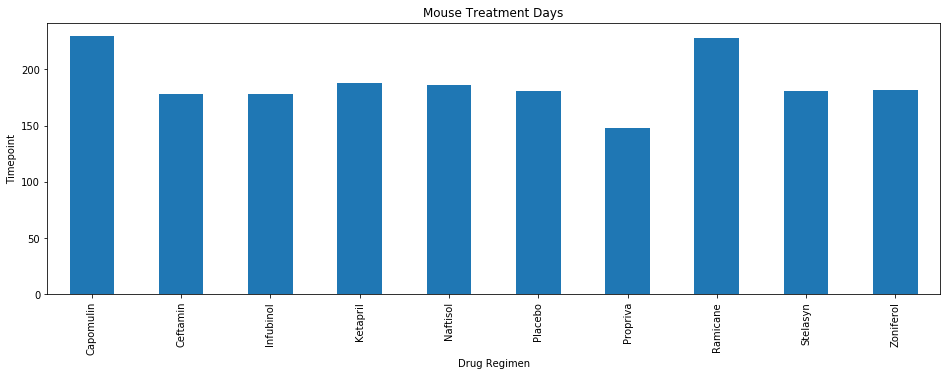

<Figure size 432x288 with 0 Axes>

In [47]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
# use pandas.DataFrame.plot()
mice_per_treatment_df.plot(kind="bar", figsize=(16,5))

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.show()
plt.tight_layout()

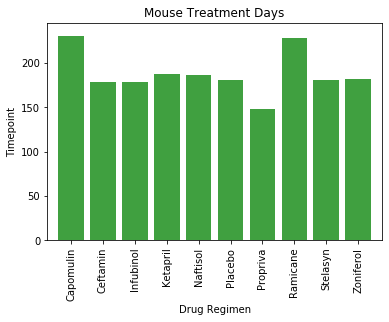

In [42]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-atl-data-pt-03-2020-u-c/blob/master/05-Matplotlib/2/Activities/01-Stu_PlotsReview/Solved/plot_drills.ipynb
#use matplotlib.pyplot()
treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
days = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

treatment = np.arange(len(mice_per_treatment_df))
tick_locations = []
for x in treatment:
    tick_locations.append(x)
    
plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.xlim(-0.75, len(treatment)-0.25)
plt.ylim(0, max(days) + 15)

plt.bar(treatment, days, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.show()

## Pie Plots

In [18]:
#Gender DataFrame for Pie plots by sex and mouse id - Pie plots need percentage*100
#calculate the total male and females
#calculate the percents for male vs female
#Find the percent for the number of male vs female

gender_pie = Clean_Mouse_DF.groupby(['Sex', 'Mouse ID']).size()
gender_pie = pd.DataFrame(gender_pie.groupby(['Sex']).count())
gender_pie.columns = ['Total Gender Count']
gender_pie['% of Gender'] = (100*(gender_pie['Total Gender Count']/gender_pie['Total Gender Count'].sum()))
gender_pie

,Total Gender Count,% of Gender
Sex,,
Female,123,49.596774
Male,125,50.403226


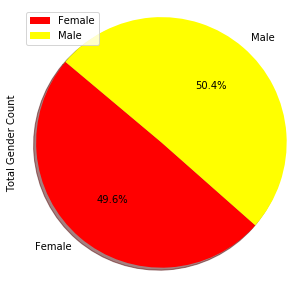

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a pie plot using both Pandas's `DataFrame.plot() 
#https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-atl-data-pt-03-2020-u-c/blob/master/05-Matplotlib/2/Activities/01-Stu_PlotsReview/Solved/plot_drills.ipynb
labels = ["Female", "Male"]
colors = ["Red", "yellow"]
explode = (0.1, 0)

#plt.title("Mice Distribution by Gender")
plot = gender_pie.plot.pie(y='Total Gender Count', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()

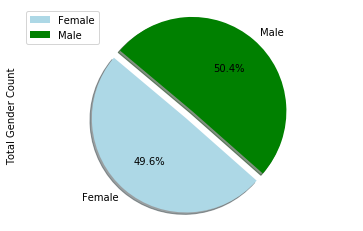

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Chart our data, give it a title, and label the axes
labels = ["Female", "Male"]
percent = [49.596774, 50.403226]
colors = ["lightblue", "green"]
explode = (0.1, 0)
#plt.title("Mice Distribution by Gender")
plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(loc="best")
plt.ylabel("Total Gender Count")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Find the top 4 treatment regimens - Readme provides top (Capomulin, Ramicane, Infubinol, and Ceftamin)
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

#Create Dataframe for the Top 4 Drug Regimen, Mouse ID and the final tumor volume 
#top 4 drugs list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_4_drugs = Clean_Mouse_DF[Clean_Mouse_DF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4_drugs = top_4_drugs.sort_values(["Timepoint"], ascending=True)
top_4_drugs_final = top_4_drugs[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
top_4_drugs_finals = pd.DataFrame(top_4_drugs_final)
top_4_drugs_finals.reset_index()

,index,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,0,Capomulin,b128,45.000000
1,221,Ceftamin,q483,45.000000
2,220,Ceftamin,o287,45.000000
3,219,Ceftamin,b487,45.000000
4,218,Ceftamin,p438,45.000000
...,...,...,...,...
809,1802,Infubinol,e476,62.435404
810,1804,Infubinol,a203,67.973419
811,1806,Infubinol,f345,60.918767
812,1810,Ceftamin,l471,67.748662


In [22]:
#Checking Data using the location of Tumor Volume
#Capo_quartiles.loc[:,"Tumor Volume (mm3)"]

In [23]:
#Checking Data for Capomulin using the describe 
#Clean_Mouse_DF[Clean_Mouse_DF["Drug Regimen"]== "Capomulin"].describe()

In [24]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations 

###### NOTE TO TA: I'm getting the sparing data even after checking my data above using .describe and checking the location of the dataframe. 
### TA Tom checked everyline with the key and he couldn't find the issue but my coding looks good and is accurate. ######
Capo_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Capomulin"]).quantile([.25,.5,.75]) 
Capo_lowerq = Capo_quartiles.loc[.25,"Tumor Volume (mm3)"]
Cap_upperq = Capo_quartiles.loc[.75,"Tumor Volume (mm3)"]
Cap_iqr =  Cap_upperq - Capo_lowerq
Caplowerbd = Capo_lowerq - (1.5*Cap_iqr)
Capupperbd = Cap_upperq + (1.5*Cap_iqr)


print(f"The the median of Capomulin is: {Capo_quartiles}")
print(f"The lower quartile of Capomulin is: {Capo_lowerq}")
print(f"The upper quartile of Capomulin is: {Cap_upperq}")
print(f"The interquartile range of Capomulin is: {Cap_iqr}")
print(f"The lower bound of Capomulin is: {Caplowerbd}")
print(f"The higher bound range of Capomulin is: {Capupperbd}")

Capomulin_final_df = pd.DataFrame(Capo_quartiles)
Capomulin_final_df

The the median of Capomulin is:       Tumor Volume (mm3)
0.25           37.685933
0.50           41.557809
0.75           45.000000
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The lower bound of Capomulin is: 26.714832162499995
The higher bound range of Capomulin is: 55.9711007025


,Tumor Volume (mm3)
0.25,37.685933
0.50,41.557809
0.75,45.000000


In [25]:
#Checking Data for Capomulin using the describe 
#Clean_Mouse_DF[Clean_Mouse_DF["Drug Regimen"]== "Ramicane"].describe()

In [26]:
#Calculate the IQR and quantitatively for Ramicane determine if there are any potential outliers. 
Rami_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Ramicane"]).quantile([.25,.5,.75])
Rami_lowerq = Rami_quartiles.loc[.25,"Tumor Volume (mm3)"]
Rami_upperq = Rami_quartiles.loc[.75,"Tumor Volume (mm3)"]
Rami_iqr =  Rami_upperq - Rami_lowerq
Ramilowerbd = Rami_lowerq - (1.5*Rami_iqr)
Ramiupperbd = Rami_upperq + (1.5*Rami_iqr)
Ramiupperbd

print(f"The the median of Ramicane is: {Rami_quartiles}")
print(f"The lower quartile of Ramicane is: {Rami_lowerq}")
print(f"The upper quartile of Ramicane is: {Rami_upperq}")
print(f"The interquartile range of Ramicane is: {Rami_iqr}")
print(f"The lower bound of Ramicane is: {Ramilowerbd}")
print(f"The higher bound range of Ramicane is: {Ramiupperbd}")

Ramicane_final_df = pd.DataFrame(Rami_quartiles)
Ramicane_final_df

The the median of Ramicane is:       Tumor Volume (mm3)
0.25           36.674635
0.50           40.673236
0.75           45.000000
The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The lower bound of Ramicane is: 24.18658646249998
The higher bound range of Ramicane is: 57.48804812250001


,Tumor Volume (mm3)
0.25,36.674635
0.50,40.673236
0.75,45.000000


In [27]:
#Calculate the IQR and quantitatively for Infubinol determine if there are any potential outliers. 
Infub_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Infubinol"]).quantile([.25,.5,.75])
Infub_lowerq = Infub_quartiles.loc[.25,"Tumor Volume (mm3)"]
Infub_upperq = Infub_quartiles.loc[.75,"Tumor Volume (mm3)"]
Infub_iqr =  Infub_upperq - Infub_lowerq
Infublowerbd = Infub_lowerq - (1.5*Infub_iqr)
Infubupperbd = Infub_upperq + (1.5*Infub_iqr)

print(f"The the median of Infubinol is: {Infub_quartiles}")
print(f"The lower quartile of Infubinol is: {Infub_lowerq}")
print(f"The upper quartile of Infubinol is: {Infub_upperq}")
print(f"The interquartile range of Infubinol is: {Infub_iqr}")
print(f"The lower bound of Infubinol is: {Infublowerbd}")
print(f"The higher bound range of Infubinol is: {Infubupperbd}")

Infubinol_final_df = pd.DataFrame(Infub_quartiles)
Infubinol_final_df

The the median of Infubinol is:       Tumor Volume (mm3)
0.25           47.312353
0.50           51.820584
0.75           57.314444
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The lower bound of Infubinol is: 32.309217298749985
The higher bound range of Infubinol is: 72.31757996875001


,Tumor Volume (mm3)
0.25,47.312353
0.50,51.820584
0.75,57.314444


In [28]:
#Calculate the IQR and quantitatively for Ceftamin determine if there are any potential outliers.  
Ceft_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Ceftamin"]).quantile([.25,.5,.75])
Ceft_lowerq = Ceft_quartiles.loc[.25,"Tumor Volume (mm3)"]
Ceft_upperq = Ceft_quartiles.loc[.75,"Tumor Volume (mm3)"]
Ceft_iqr =  Ceft_upperq - Ceft_lowerq
Ceftlowerbd = Ceft_lowerq - (1.5*Ceft_iqr)
Ceftupperbd = Ceft_upperq + (1.5*Ceft_iqr)

print(f"The the median of Ceftamin is: {Ceft_quartiles}")
print(f"The lower quartile of Ceftamin is: {Ceft_lowerq}")
print(f"The upper quartile of Ceftamin is: {Ceft_upperq}")
print(f"The interquartile range of Ceftamin is: {Ceft_iqr}")
print(f"The lower bound of Ceftamin is: {Ceftlowerbd}")
print(f"The higher bound range of Ceftamin is: {Ceftupperbd}")

Ceftamin_final_df = pd.DataFrame(Ceft_quartiles)
Ceftamin_final_df

The the median of Ceftamin is:       Tumor Volume (mm3)
0.25           47.208427
0.50           51.776157
0.75           56.801438
The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.5930104575
The lower bound of Ceftamin is: 32.818911426250004
The higher bound range of Ceftamin is: 71.19095325625


,Tumor Volume (mm3)
0.25,47.208427
0.50,51.776157
0.75,56.801438


In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#####NOTE TO TA IF YOU COMMENT OUT THE PLOT.TITLE IT WILL STILL CREATE IT'S OWN TITLE CALLED "BOXPLOT GROUPED BY DRUG REGIMEN"
#https://pythontic.com/pandas/dataframe-plotting/box%20and%20whisker%20plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

#Continue to create the last tumor volume of each "mouse and drug regimen
lasttmvol_top4_final = top_4_drugs_finals.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']


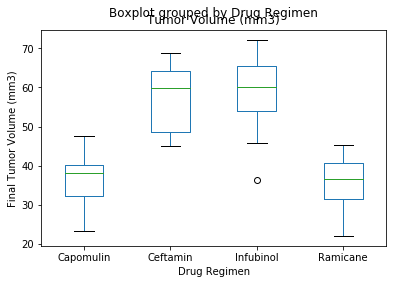

In [35]:
lasttmvol_top4_final_df = pd.DataFrame(lasttmvol_top4_final)
lasttmvol_top4_final_df.reset_index()

# Create an ndarray with four columns and 20 rows
lasttmvol_top4_final_df.boxplot(by='Drug Regimen', column =['Tumor Volume (mm3)'], grid=False)
                                          
#plot.title("Mouse L509 Capomulin Treatment")
plot.xlabel("Drug Regimen")
plot.ylabel("Final Tumor Volume (mm3)")
plot.show()

## Line and Scatter Plots

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
#gapminder_years= gapminder[gapminder.year.isin(years)]

#Created DataFrame for specific mouse R944 with Timepoint and Tumor Volume for Capomulin treatment
timepoint_vs_tumorvol = Clean_Mouse_DF[Clean_Mouse_DF['Mouse ID']=='l509'] 
timepoint_vs_tumorvol_final = timepoint_vs_tumorvol[["Drug Regimen", "Mouse ID", "Timepoint", "Weight (g)", "Tumor Volume (mm3)"]]
timepoint_vs_tumorvol_final = pd.DataFrame(timepoint_vs_tumorvol_final)   
timepoint_vs_tumorvol_final

,Drug Regimen,Mouse ID,Timepoint,Weight (g),Tumor Volume (mm3)
231,Capomulin,l509,0,21,45.000000
253,Capomulin,l509,5,21,45.851193
539,Capomulin,l509,10,21,46.759074
881,Capomulin,l509,15,21,47.488599
982,Capomulin,l509,20,21,48.070452
1146,Capomulin,l509,25,21,44.006257
1414,Capomulin,l509,30,21,44.708055
1499,Capomulin,l509,35,21,40.207289
1723,Capomulin,l509,40,21,40.770813
1771,Capomulin,l509,45,21,41.483008


In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 
Capo_lineplot_data = timepoint_vs_tumorvol_final[["Timepoint", "Tumor Volume (mm3)"]]
Capo_lineplot_data.head()


,Timepoint,Tumor Volume (mm3)
231,0,45.000000
253,5,45.851193
539,10,46.759074
881,15,47.488599
982,20,48.070452


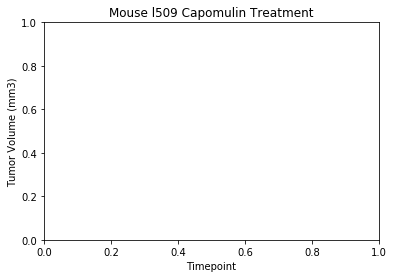

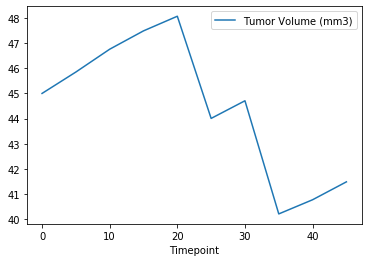

In [40]:

# Plot the line chart
plt.title("Mouse l509 Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Capo_lineplot_data = Capo_lineplot_data.plot(kind='line', x='Timepoint', y ='Tumor Volume (mm3)')
plt.show()

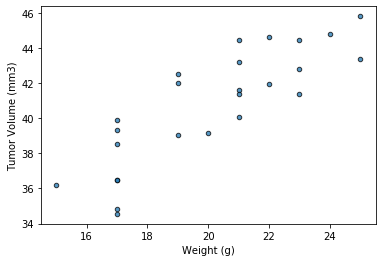

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# calculate the mean of the mouse weight and the tumor value for capomulin reginmen (drug regimen)
scatter_mw_vs_tmvol = Clean_Mouse_DF.loc[Clean_Mouse_DF['Drug Regimen']== 'Capomulin']
scatter_mw_vs_tmvol_df = scatter_mw_vs_tmvol.groupby('Mouse ID').mean()
scatter_mw_vs_tmvol_df_final = pd.DataFrame(scatter_mw_vs_tmvol_df)
scatter_mw_vs_tmvol_df_final

Capomulin_scat = scatter_mw_vs_tmvol_df.plot(kind='scatter', x='Weight (g)', y ='Tumor Volume (mm3)', facecolors="red", edgecolors="black", alpha=0.75)
plt.show()

## Correlation and Regression

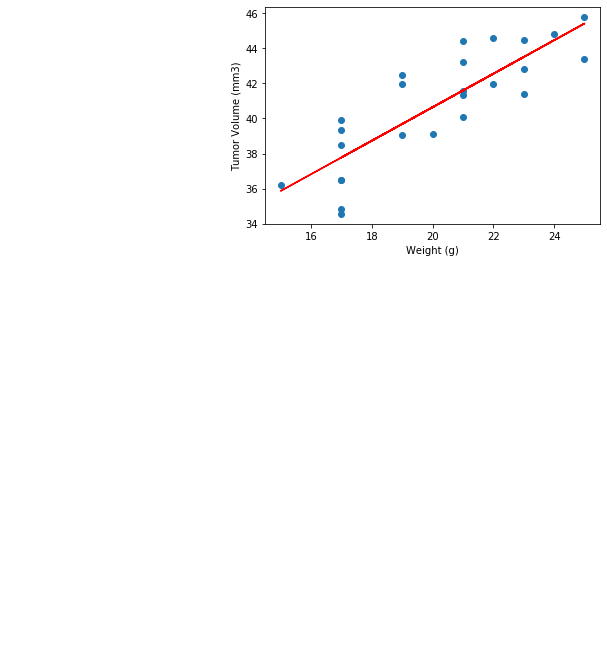

In [33]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
#Plot the linear regression model on top of the previous scatter plot.
# https://www.w3schools.com/python/python_ml_linear_regression.asp - used this to import linregress
from matplotlib import pyplot as plt
from scipy.stats import linregress

x_values = scatter_mw_vs_tmvol_df_final["Weight (g)"]
y_values = scatter_mw_vs_tmvol_df_final["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()